## APPM 4650: Project 1

Group: Constance Delannoy, Noah Francis, Boris Shapoval   
Date: 7/12/2020

Boundary Layer Equations:
$$\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = 0$$  

$$u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} = \nu \frac{\partial^2 u}{\partial y^2}$$  

$$u\frac{\partial T}{\partial x} + v\frac{\partial T}{\partial y} = \alpha\frac{\partial^2 T}{\partial y^2}$$  

$\nu$ is the kinematic viscosity and $\alpha$ is the thermal diffusivity.  

Boundary Conditions:  
$T(0,y) = T_\infty$  
$u(0,y) = U_\infty$  
$v(0,y) = 0$  
$T(x,0) = T_w$  
$u(x,0) = 0$  
$v(x,0) = 0$  
$T(x,\infty) = T_\infty$  
$u(x,\infty) = U_\infty$

Use the following similarity transformation:
$$u = U_\infty F'(\eta)$$  
$$v = \frac{1}{2}\sqrt{\frac{\nu U_\infty}{x}}[\eta F'(\eta) - F(\eta)]$$  
$$G(\eta,\text{Pr}) = \frac{T - T_\infty}{T_w - T_\infty}$$

where:  
$$\eta = \frac{y}{\sqrt{\frac{\nu x}{U_\infty}}}$$
$$\text{Pr} = \frac{\nu}{\alpha}$$  

Get the following two coupled ODEs:  
$$F''' + \frac{1}{2}FF'' = 0$$
$$G'' + \frac{\text{Pr}}{2}FG' = 0$$

with BCs:  
$F(0) = 0$  
$F'(0) = 0$  
$F'(\infty) = 1$  
$G(0) = 1$  
$G(\infty) = 0$  

Now reducing the higher order ODEs down to a system of first order ODEs:  
$F=y_1$  
$F' = y_1' = y_2$  
$F'' = y_2' = y_3$  
$F''' = y_3' = -\frac{1}{2}FF'' = -\frac{1}{2}y_1 y_3$  
$G = y_4$  
$G' = y_4' = y_5$  
$G'' = y_5' = -\frac{\text{Pr}}{2}FG' = -\frac{\text{Pr}}{2}y_1 y_5$

So we have:  
$$
\boxed{y_1' = y_2\\ y_2' = y_3\\ y_3' = -\frac{1}{2}y_1 y_3\\ y_4' = y_5\\ y_5' = -\frac{\text{Pr}}{2}y_1 y_5}
$$

with BCs:
$$
\boxed{y_1(0)=0\\ y_2(0)=0\\ y_2(\infty)=1\\ y_4(0)=1\\ y_4(\infty)=0}
$$

This implies that the initial conditions of $y_3$ and $y_5$ must be chosen such that the conditions on $y_2$ and $y_4$ are satisfied as $\eta \rightarrow \infty$

In [43]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from numpy import arange, exp, array, inf, array, zeros, nan
from scipy.constants import c,pi

In [44]:
def RK4(t, y1, y2, y3, y4, y5, h, Pr):
    
    # define inner functions 
    def f1(t, y1, y2, y3, y4, y5):
        f1 = y2
        return f1
    
    def f2(t, y1, y2, y3, y4, y5):
        f2 = y3
        return f2
    
    def f3(t, y1, y2, y3, y4, y5):
        f3 = -0.5 * y1 * y3
        return f3
    
    def f4(t, y1, y2, y3, y4, y5):
        f4 = y5
        return f4
    
    def f5(t, y1, y2, y3, y4, y5, Pr):
        f5 = -Pr * 0.5 * y1 * y5
        return f5
    
    # Runge-Kutta 4th Order
    for i in range(len(t)):
        k11 = h * f1(t[i], y1[i], y2[i], y3[i], y4[i], y5[i])
        k12 = h * f2(t[i], y1[i], y2[i], y3[i], y4[i], y5[i])
        k13 = h * f3(t[i], y1[i], y2[i], y3[i], y4[i], y5[i])
        k14 = h * f4(t[i], y1[i], y2[i], y3[i], y4[i], y5[i])
        k15 = h * f5(t[i], y1[i], y2[i], y3[i], y4[i], y5[i], Pr)

        k21 = h * f1(t[i], y1[i] + 0.5 * k11, y2[i] + 0.5 * k12, y3[i] + 0.5 * k13, y4[i] + 0.5 * k14, y5[i] + 0.5 * k15)
        k22 = h * f2(t[i], y1[i] + 0.5 * k11, y2[i] + 0.5 * k12, y3[i] + 0.5 * k13, y4[i] + 0.5 * k14, y5[i] + 0.5 * k15)
        k23 = h * f3(t[i], y1[i] + 0.5 * k11, y2[i] + 0.5 * k12, y3[i] + 0.5 * k13, y4[i] + 0.5 * k14, y5[i] + 0.5 * k15)
        k24 = h * f4(t[i], y1[i] + 0.5 * k11, y2[i] + 0.5 * k12, y3[i] + 0.5 * k13, y4[i] + 0.5 * k14, y5[i] + 0.5 * k15)
        k25 = h * f5(t[i], y1[i] + 0.5 * k11, y2[i] + 0.5 * k12, y3[i] + 0.5 * k13, y4[i] + 0.5 * k14, y5[i] + 0.5 * k15, Pr)

        k31 = h * f1(t[i], y1[i] + 0.5 * k21, y2[i] + 0.5 * k22, y3[i] + 0.5 * k23, y4[i] + 0.5 * k24, y5[i] + 0.5 * k25)
        k32 = h * f2(t[i], y1[i] + 0.5 * k21, y2[i] + 0.5 * k22, y3[i] + 0.5 * k23, y4[i] + 0.5 * k24, y5[i] + 0.5 * k25)
        k33 = h * f3(t[i], y1[i] + 0.5 * k21, y2[i] + 0.5 * k22, y3[i] + 0.5 * k23, y4[i] + 0.5 * k24, y5[i] + 0.5 * k25)
        k34 = h * f4(t[i], y1[i] + 0.5 * k21, y2[i] + 0.5 * k22, y3[i] + 0.5 * k23, y4[i] + 0.5 * k24, y5[i] + 0.5 * k25)
        k35 = h * f5(t[i], y1[i] + 0.5 * k21, y2[i] + 0.5 * k22, y3[i] + 0.5 * k23, y4[i] + 0.5 * k24, y5[i] + 0.5 * k25, Pr)

        k41 = h * f1(t[i], y1[i] + k31, y2[i] + k32, y3[i] + k33, y4[i] + k34, y5[i] + k35)
        k42 = h * f2(t[i], y1[i] + k31, y2[i] + k32, y3[i] + k33, y4[i] + k34, y5[i] + k35)
        k43 = h * f3(t[i], y1[i] + k31, y2[i] + k32, y3[i] + k33, y4[i] + k34, y5[i] + k35)
        k44 = h * f4(t[i], y1[i] + k31, y2[i] + k32, y3[i] + k33, y4[i] + k34, y5[i] + k35)
        k45 = h * f5(t[i], y1[i] + k31, y2[i] + k32, y3[i] + k33, y4[i] + k34, y5[i] + k35, Pr)

        y1[i+1] = y1[i] + (k11 + 2 * k21 + 2 * k31 + k41) / 6
        y2[i+1] = y2[i] + (k12 + 2 * k22 + 2 * k32 + k42) / 6
        y3[i+1] = y3[i] + (k13 + 2 * k23 + 2 * k33 + k43) / 6
        y4[i+1] = y4[i] + (k14 + 2 * k24 + 2 * k34 + k44) / 6
        y5[i+1] = y5[i] + (k15 + 2 * k25 + 2 * k35 + k45) / 6
        
    return y1, y2, y3, y4, y5

##### Finding $y_3(0)$ and $y_5(0)$ Using $y_2(\infty)=1$ and $y_4(\infty)=0$

In [45]:
# Find Machine Epsilon and set error bound a bit greater than it
# float_epsilon = np.finfo(float).eps
# print(float_epsilon) # --> 2.220446049250313e-16 --> so 10**-14 

Pr = 5
h = 0.1 # step size
t = arange(0, 10 + h, h)
y1 = zeros(len(t) + 1)
y2 = zeros(len(t) + 1)
y3 = zeros(len(t) + 1)
y4 = zeros(len(t) + 1)
y5 = zeros(len(t) + 1)
y1[0] = 0
y2[0] = 0
y3[0] = 5
y4[0] = 1
y5[0] = 5


## Need to solve for F first

# use Bisection method to find y3(0) that makes y2(infinity)=1
a = 0
b = y3[0]
c = []
abs_err3 = [inf]
i = 0
while abs_err3[i] > 10**-6:
    # f_a
    y1 = zeros(len(t) + 1)
    y2 = zeros(len(t) + 1)
    y3a = zeros(len(t) + 1)
    y4 = zeros(len(t) + 1)
    y5 = zeros(len(t) + 1)
    y1[0] = 0
    y2[0] = 0
    y3a[0] = a
    y4[0] = 1
    y5[0] = 5
    y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3a, y4, y5, h, Pr)
    f_a = y2[-1]
    
    # f_b
    y1 = zeros(len(t) + 1)
    y2 = zeros(len(t) + 1)
    y3b = zeros(len(t) + 1)
    y4 = zeros(len(t) + 1)
    y5 = zeros(len(t) + 1)
    y1[0] = 0
    y2[0] = 0
    y3b[0] = b
    y4[0] = 1
    y5[0] = 5
    y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3b, y4, y5, h, Pr)
    f_b = y2[-1]
    
    # test if there is an odd number of roots in between a and b
    if (f_a - 1)*(f_b - 1) < 0:
        c.append((a + b) / 2)
        # f_c
        y1 = zeros(len(t) + 1)
        y2 = zeros(len(t) + 1)
        y3c = zeros(len(t) + 1)
        y4 = zeros(len(t) + 1)
        y5 = zeros(len(t) + 1)
        y1[0] = 0
        y2[0] = 0
        y3c[0] = c[i]
        y4[0] = 1
        y5[0] = 5
        y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3c, y4, y5, h, Pr)
        f_c = y2[-1]
        
        # get rid of interval that does not contain an odd number of roots
        if (f_a - 1)*(f_c - 1) < 0: # odd number of roots in interval
            abs_err3.append(abs(b - c[i]))
            b = c[i]
        elif (f_a - 1)*(f_c - 1) > 0: # even number of roots in interval
            abs_err3.append(abs(a - c[i]))
            a = c[i]
        elif (f_a - 1)*(f_c - 1) == 0: # exactly found the root!
            break
    i += 1

y3_0 = c[-1]
print('y2(infinity) = ' + repr(y2[-1]))
print('y3(0) = ' + repr(y3_0))
print('')


## Now to solve G 

# reinitialize with newly found IC y3[0]
y1 = zeros(len(t) + 1)
y2 = zeros(len(t) + 1)
y3 = zeros(len(t) + 1)
y4 = zeros(len(t) + 1)
y5 = zeros(len(t) + 1)
y1[0] = 0
y2[0] = 0
y3[0] = y3_0
y4[0] = 1
y5[0] = 5

# use Bisection method to find y5(0) that makes y4(infinity)=0
a = -y5[0]
b = y5[0]
c = []
abs_err5 = [inf]
i = 0
while abs_err5[i] > 10**-6:
    # f_a
    y1 = zeros(len(t) + 1)
    y2 = zeros(len(t) + 1)
    y3 = zeros(len(t) + 1)
    y4 = zeros(len(t) + 1)
    y5a = zeros(len(t) + 1)
    y1[0] = 0
    y2[0] = 0
    y3[0] = y3_0
    y4[0] = 1
    y5a[0] = a
    y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3, y4, y5a, h, Pr)
    f_a = y4[-1]
    
    # f_b
    y1 = zeros(len(t) + 1)
    y2 = zeros(len(t) + 1)
    y3 = zeros(len(t) + 1)
    y4 = zeros(len(t) + 1)
    y5b = zeros(len(t) + 1)
    y1[0] = 0
    y2[0] = 0
    y3[0] = y3_0
    y4[0] = 1
    y5b[0] = b
    y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3, y4, y5b, h, Pr)
    f_b = y4[-1]
    
    # test if there is an odd number of roots in between a and b
    if f_a*f_b < 0:
        c.append((a + b) / 2)
        # f_c
        y1 = zeros(len(t) + 1)
        y2 = zeros(len(t) + 1)
        y3 = zeros(len(t) + 1)
        y4 = zeros(len(t) + 1)
        y5c = zeros(len(t) + 1)
        y1[0] = 0
        y2[0] = 0
        y3[0] = y3_0
        y4[0] = 1
        y5c[0] = c[i]
        y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3, y4, y5c, h, Pr)
        f_c = y4[-1]
        
        # get rid of interval that does not contain an odd number of roots
        if f_a*f_c < 0: # odd number of roots in interval
            abs_err5.append(abs(b - c[i]))
            b = c[i]
        elif f_a*f_c > 0: # even number of roots in interval
            abs_err5.append(abs(a - c[i]))
            a = c[i]
        elif f_a*f_c == 0: # exactly found the root!
            break
    i += 1
    
y5_0 = c[-1]
print('y4(infinity) = ' + repr(y4[-1]))
print('y5(0) = ' + repr(y5_0))

y2(infinity) = 0.99999906588674148
y3(0) = 0.33205687999725342

y4(infinity) = -3.8881891877182505e-07
y5(0) = -0.57668864727020264


So the initial conditions for $\text{Pr} = 5$ turn out to be:  

$$
\boxed{y_1(0)=0\\ y_2(0)=0\\ y_3(0)=0.3320573456\\ y_4(0)=1\\ y_5(0)=-0.5766886925}
$$

##### Using the ICs to Solve the F and G Equations

In [46]:
Pr = 5
h = 0.1
eta = arange(0, 10 + h, h)
y1 = zeros(len(t) + 1)
y2 = zeros(len(t) + 1)
y3 = zeros(len(t) + 1)
y4 = zeros(len(t) + 1)
y5 = zeros(len(t) + 1)
y1[0] = 0
y2[0] = 0
y3[0] = y3_0
y4[0] = 1
y5[0] = y5_0
y1, y2, y3, y4, y5 = RK4(eta, y1, y2, y3, y4, y5, h, 5)

pd.DataFrame({'F' : y1, 'F\'' : y2, 'F\'\'' : y3, 'G' : y4, 'G\'' : y5 })

,F,F',F'',G,G'
0,0.000000,0.000000,3.320569e-01,1.000000e+00,-5.766886e-01
1,0.001660,0.033205,3.320477e-01,9.423331e-01,-5.766089e-01
2,0.006641,0.066408,3.319834e-01,8.846942e-01,-5.760507e-01
3,0.014941,0.099598,3.318089e-01,8.271548e-01,-5.745385e-01
4,0.026560,0.132764,3.314694e-01,7.698339e-01,-5.716052e-01
5,0.041493,0.165885,3.309105e-01,7.128961e-01,-5.668026e-01
6,0.059735,0.198937,3.300787e-01,6.565496e-01,-5.597143e-01
7,0.081277,0.231890,3.289216e-01,6.010418e-01,-5.499728e-01
8,0.106108,0.264709,3.273888e-01,5.466537e-01,-5.372772e-01
9,0.134213,0.297354,3.254322e-01,4.936922e-01,-5.214129e-01


In [47]:
# dimensionless velocities
u_ = y2[:-1]
v_ = 0.5 * (eta * y2[:-1] - y1[:-1])

# # find eta close to where dimensionless u hits 0.99
# p = u_ >= 0.99
# eta_m = eta[p][0]

# # plotting dimensionless velocity
# fig = plt.figure(figsize = (5, 3), dpi = 200)
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(eta, u_, label=r'$F^{\prime}(\eta)$')
# ax.plot(eta, v_, label=r'$\frac{1}{2}[\eta F^{\prime}(\eta) - F(\eta)]$')
# ax.scatter(eta_m, u_[p][0], s=20, color='m', zorder=10, label=r'$\eta_m = 5.0$')
# ax.plot(eta_m * np.ones(100), arange(0,1,0.01), color='m', linestyle='dashed', lw=1)
# ax.set_title(r'Dimensionless $u$ and $v$ Flow Velocities')
# ax.set_xlabel(r'$\eta$')
# ax.grid()
# ax.legend()
# plt.show()

In [48]:
# # find eta close to where dimensionless T hits 0.01
# p = y4[:-1] <= 0.01
# eta_t = eta[p][0]

# # plotting dimensionless temperature
# fig = plt.figure(figsize = (5, 3), dpi = 200)
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(eta, y4[:-1], label=r'$G(\eta)$', color='g')
# ax.scatter(eta_t, y4[:-1][p][0], s=20, color='b', zorder=10, label=r'$\eta_t = 2.8$')
# # ax.plot(eta_t * np.ones(102), arange(0,1.02,0.01), color='m', linestyle='dashed', lw=1)
# ax.set_title(r'Dimensionless Temperature $G(\eta)$ for Pr=5')
# ax.set_xlabel(r'$\eta$')
# ax.grid()
# ax.legend()
# plt.show()

##### Using Neville's Method for Interpolation

In [49]:
## first for eta_m
p = np.where(u_ >= 0.99)
p = [p[0][0] - 2, p[0][0] - 1, p[0][0], p[0][1]]

# using same notation as used in HW02
x_ = 0.99
x = u_[p]
f = eta[p]
Q = np.transpose([f[:],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
for i in [1,2,3]:
    for j in [1,2,3]:
        Q[i,j] = ((x_-x[i-j])/(x[i]-x[i-j]))*Q[i,j-1] + ((x_-x[i])/(x[i-j]-x[i]))*Q[i-1,j-1]
Q[1,2] = 0
Q[1,3] = 0
Q[2,3] = 0
eta_m = Q[3,3]
print('Using Four Points: Q[3,3] = eta_m = ' + repr(Q[3,3]))

## now for eta_t
p = np.where(y4[:-1] <= 0.01)
p = [p[0][0] - 2, p[0][0] - 1, p[0][0], p[0][1]]

# using same notation as used in HW02
x_ = 0.01
x = y4[:-1][p]
f = eta[p]
Q = np.transpose([f[:],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
for i in [1,2,3]:
    for j in [1,2,3]:
        Q[i,j] = ((x_-x[i-j])/(x[i]-x[i-j]))*Q[i,j-1] + ((x_-x[i])/(x[i-j]-x[i]))*Q[i-1,j-1]
Q[1,2] = 0
Q[1,3] = 0
Q[2,3] = 0
eta_t = Q[3,3]
print('Using Four Points: Q[3,3] = eta_t = ' + repr(Q[3,3]))

Using Four Points: Q[3,3] = eta_m = 4.9100188905399271
Using Four Points: Q[3,3] = eta_t = 2.749393684204013


##### Replot with Actual Interpolated Values of $\eta_m$ and $\eta_t$

In [50]:
# # plotting dimensionless velocity
# fig = plt.figure(figsize = (6, 3), dpi = 200)
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(eta, u_, label=r'$F^{\prime}(\eta)$')
# ax.plot(eta, v_, label=r'$\frac{1}{2}[\eta F^{\prime}(\eta) - F(\eta)]$')
# ax.scatter(eta_m, 0.99, s=20, color='m', zorder=10, label=r'$\eta_m = 4.9100188$')
# ax.plot(eta_m * np.ones(100), arange(0,1,0.01), color='m', linestyle='dashed', lw=1)
# ax.set_title(r'Dimensionless $u$ and $v$ Flow Velocities')
# ax.set_xlabel(r'$\eta$')
# ax.grid()
# ax.legend()
# plt.show()

# # plotting dimensionless temperature
# fig = plt.figure(figsize = (6, 3), dpi = 200)
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(eta, y4[:-1], label=r'$G(\eta)$', color='g')
# ax.scatter(eta_t, 0.01, s=20, color='b', zorder=10, label=r'$\eta_t = 2.7493936$')
# # ax.plot(eta_t * np.ones(102), arange(0,1.02,0.01), color='m', linestyle='dashed', lw=1)
# ax.set_title(r'Dimensionless Temperature $G(\eta)$ for Pr=5')
# ax.set_xlabel(r'$\eta$')
# ax.grid()
# ax.legend()
# plt.show()

##### Plot Growth of the Momentum and Thermal Boundary Layer Thickness as a Function of Position Along the Plate

Want $\frac{\delta_m}{L}\sqrt{\text{Re}}$ and $\frac{\delta_t}{L}\sqrt{\text{Re}}$ as a function of $\frac{x}{L}$, so taking the definition of $\eta$ :  

$$
\eta = \frac{y}{\sqrt{\frac{\nu x}{U_\infty}}}
$$

The dimensionless Reynolds number is defined as:

$$
\text{Re} = \frac{U_\infty L}{\nu}
$$

so by multiplying the fraction under the square root by $L/L$ we can plug this into $\eta$ :

$$
\eta = \frac{y}{\sqrt{\frac{\nu x}{U_\infty}\cdot\frac{L}{L}}}= \frac{y}{\sqrt{\frac{xL}{\text{Re}}}} = \frac{y\sqrt{\text{Re}}}{\sqrt{x}\sqrt{L}}
$$

now multiplying the RHS by $\sqrt{L/L}$:

$$
\eta = \frac{y\sqrt{\text{Re}}}{\sqrt{x}\sqrt{L}}\cdot\frac{\sqrt{L}}{\sqrt{L}} = \frac{y}{L}\sqrt{\text{Re}}\sqrt{\frac{L}{x}}
$$

finally multiplying both sides by $\sqrt{x/L}$ we get:

$$
\boxed{\eta\sqrt{\frac{x}{L}} = \frac{y}{L}\sqrt{\text{Re}}}
$$

now if $\eta = \eta_m$, $y = \delta_m$  
and if $\eta = \eta_t$, $y = \delta_t$

$$
\rightarrow\boxed{\eta_m\sqrt{\frac{x}{L}} = \frac{\delta_m}{L}\sqrt{\text{Re}}}
$$

$$
\rightarrow\boxed{\eta_t\sqrt{\frac{x}{L}} = \frac{\delta_t}{L}\sqrt{\text{Re}}}
$$

In [60]:
n = 0.001
x_L = arange(0,1+n,n)

# dimensionless groupings
dim_grp_m = eta_m * np.sqrt(x_L) 
dim_grp_t = eta_t * np.sqrt(x_L)

# plot
fig = plt.figure(figsize = (6, 3), dpi = 200)
ax = fig.add_subplot(1, 1, 1)
ax.plot(x_L, dim_grp_m, label='Momentum Boundary Layer Thickness')
ax.plot(x_L, dim_grp_t, label='Thermal Boundary Layer Thickness (Pr = 5)')
ax.set_xlabel(r'$x/L$')
ax.set_ylabel(r'$\frac{y}{L}\sqrt{Re}$')
ax.legend()
ax.grid()
plt.show()

ValueError: operands could not be broadcast together with shapes (7,) (1001,) 

##### Finding $G'(0) = y_5(0)$ with Different Pr Numbers

In [52]:
j = 0
y5_0 = zeros(7)
for Pr in [0.1, 0.2, 0.5, 1, 2, 5, 10]:
    # reinitialize with newly found IC y3[0]
    y1 = zeros(len(t) + 1)
    y2 = zeros(len(t) + 1)
    y3 = zeros(len(t) + 1)
    y4 = zeros(len(t) + 1)
    y5 = zeros(len(t) + 1)
    y1[0] = 0
    y2[0] = 0
    y3[0] = y3_0
    y4[0] = 1
    y5[0] = 5

    # use Bisection method to find y5(0) that makes y4(infinity)=0
    a = -y5[0]
    b = y5[0]
    c = []
    abs_err5 = [inf]
    i = 0
    while abs_err5[i] > 10**-6:
        # f_a
        y1 = zeros(len(t) + 1)
        y2 = zeros(len(t) + 1)
        y3 = zeros(len(t) + 1)
        y4 = zeros(len(t) + 1)
        y5a = zeros(len(t) + 1)
        y1[0] = 0
        y2[0] = 0
        y3[0] = y3_0
        y4[0] = 1
        y5a[0] = a
        y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3, y4, y5a, h, Pr)
        f_a = y4[-1]

        # f_b
        y1 = zeros(len(t) + 1)
        y2 = zeros(len(t) + 1)
        y3 = zeros(len(t) + 1)
        y4 = zeros(len(t) + 1)
        y5b = zeros(len(t) + 1)
        y1[0] = 0
        y2[0] = 0
        y3[0] = y3_0
        y4[0] = 1
        y5b[0] = b
        y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3, y4, y5b, h, Pr)
        f_b = y4[-1]

        # test if there is an odd number of roots in between a and b
        if f_a*f_b < 0:
            c.append((a + b) / 2)
            # f_c
            y1 = zeros(len(t) + 1)
            y2 = zeros(len(t) + 1)
            y3 = zeros(len(t) + 1)
            y4 = zeros(len(t) + 1)
            y5c = zeros(len(t) + 1)
            y1[0] = 0
            y2[0] = 0
            y3[0] = y3_0
            y4[0] = 1
            y5c[0] = c[i]
            y1, y2, y3, y4, y5 = RK4(t, y1, y2, y3, y4, y5c, h, Pr)
            f_c = y4[-1]

            # get rid of interval that does not contain an odd number of roots
            if f_a*f_c < 0: # odd number of roots in interval
                abs_err5.append(abs(b - c[i]))
                b = c[i]
            elif f_a*f_c > 0: # even number of roots in interval
                abs_err5.append(abs(a - c[i]))
                a = c[i]
            elif f_a*f_c == 0: # exactly found the root!
                break
        i += 1

    y5_0[j] = c[-1]
    print('Pr = ' + repr(Pr))
    print('y4(infinity) = ' + repr(y4[-1]))
    print('y5(0) = ' + repr(y5_0[j]))
    print('')
    j += 1

Pr = 0.1
y4(infinity) = -4.014799173242007e-06
y5(0) = -0.14681398868560791

Pr = 0.2
y4(infinity) = 1.2713036056713738e-06
y5(0) = -0.18510997295379639

Pr = 0.5
y4(infinity) = -3.6032113799909832e-07
y5(0) = -0.25929749011993408

Pr = 1
y4(infinity) = 9.3411325866897921e-07
y5(0) = -0.33205687999725342

Pr = 2
y4(infinity) = 2.6740548404574937e-07
y5(0) = -0.42230784893035889

Pr = 5
y4(infinity) = -3.8881891877182505e-07
y5(0) = -0.57668864727020264

Pr = 10
y4(infinity) = -4.1012864351128913e-07
y5(0) = -0.72814047336578369



In [53]:
k = 0
eta_t = zeros(7)
for Pr in [0.1, 0.2, 0.5, 1, 2, 5, 10]:
    h = 0.1
    eta = arange(0, 10 + h, h)
    y1 = zeros(len(eta) + 1)
    y2 = zeros(len(eta) + 1)
    y3 = zeros(len(eta) + 1)
    y4 = zeros(len(eta) + 1)
    y5 = zeros(len(eta) + 1)
    y1[0] = 0
    y2[0] = 0
    y3[0] = y3_0
    y4[0] = 1
    y5[0] = y5_0[k]
    y1, y2, y3, y4, y5 = RK4(eta, y1, y2, y3, y4, y5, h, Pr)

    ## now for eta_t
    p = np.where(y4[:-1] <= 0.01)
    p = [p[0][0] - 2, p[0][0] - 1, p[0][0], p[0][1]]

    # using same notation as used in HW02 (Neville's Method)
    x_ = 0.01
    x = y4[:-1][p]
    f = eta[p]
    Q = np.transpose([f[:],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
    for i in [1,2,3]:
        for j in [1,2,3]:
            Q[i,j] = ((x_-x[i-j])/(x[i]-x[i-j]))*Q[i,j-1] + ((x_-x[i])/(x[i-j]-x[i]))*Q[i-1,j-1]
    Q[1,2] = 0
    Q[1,3] = 0
    Q[2,3] = 0
    eta_t[k] = Q[3,3]
    print('Pr = ' + repr(Pr))
    print('Using Four Points: Q[3,3] = eta_t = ' + repr(eta_t[k]))
    print('')
    
    k += 1

Pr = 0.1
Using Four Points: Q[3,3] = eta_t = 9.7226701154570421

Pr = 0.2
Using Four Points: Q[3,3] = eta_t = 8.9271587284915697

Pr = 0.5
Using Four Points: Q[3,3] = eta_t = 6.4370355771521455

Pr = 1
Using Four Points: Q[3,3] = eta_t = 4.9100188905399342

Pr = 2
Using Four Points: Q[3,3] = eta_t = 3.7991137336211493

Pr = 5
Using Four Points: Q[3,3] = eta_t = 2.749393684204013

Pr = 10
Using Four Points: Q[3,3] = eta_t = 2.1678776326172642



##### Plot $\eta_t$ as a function of Prandtl number

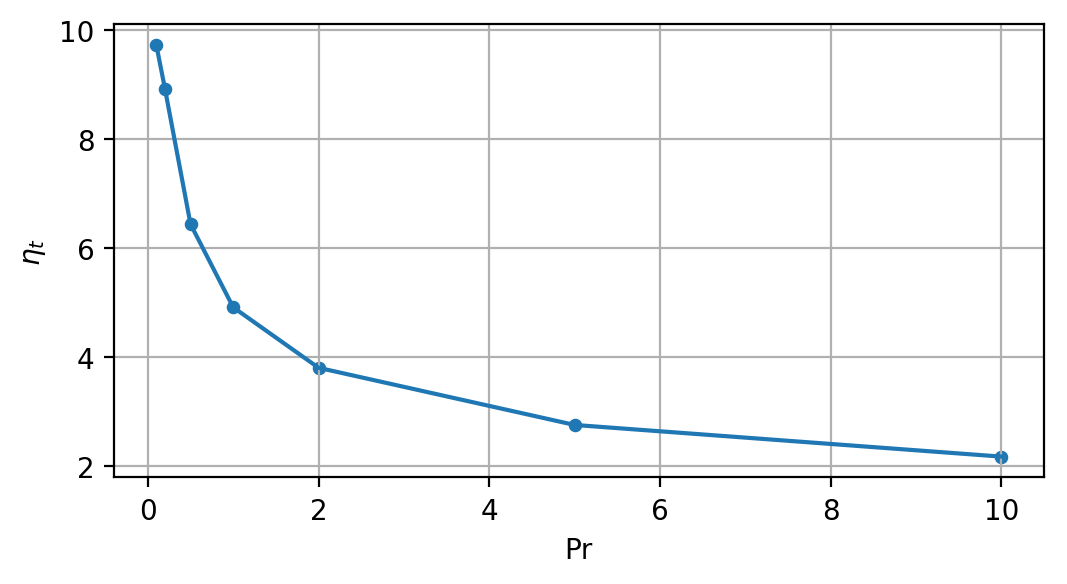

,Prandl,eta
0,0.1,9.722670
1,0.2,8.927159
2,0.5,6.437036
3,1.0,4.910019
4,2.0,3.799114
5,5.0,2.749394
6,10.0,2.167878


In [78]:
x = [0.1, 0.2, 0.5, 1, 2, 5, 10]
y = eta_t

eta_df = pd.DataFrame({'Prandl': x, 'eta': eta_t})

fig = plt.figure(figsize = (6, 3), dpi = 200)
ax = fig.add_subplot(1, 1, 1)
ax.scatter([0.1, 0.2, 0.5, 1, 2, 5, 10], eta_t, s=15)
ax.plot(x, y)
ax.set_xlabel('Pr')
ax.set_ylabel(r'$\eta_t$')
ax.grid()
plt.savefig('Fig4.png')
plt.show()

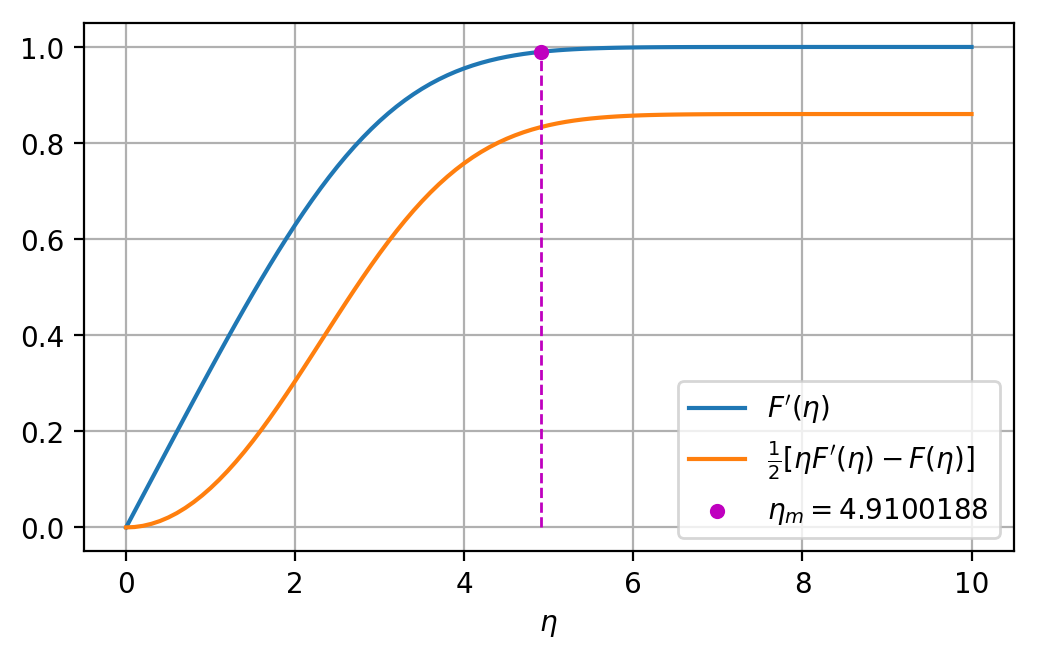

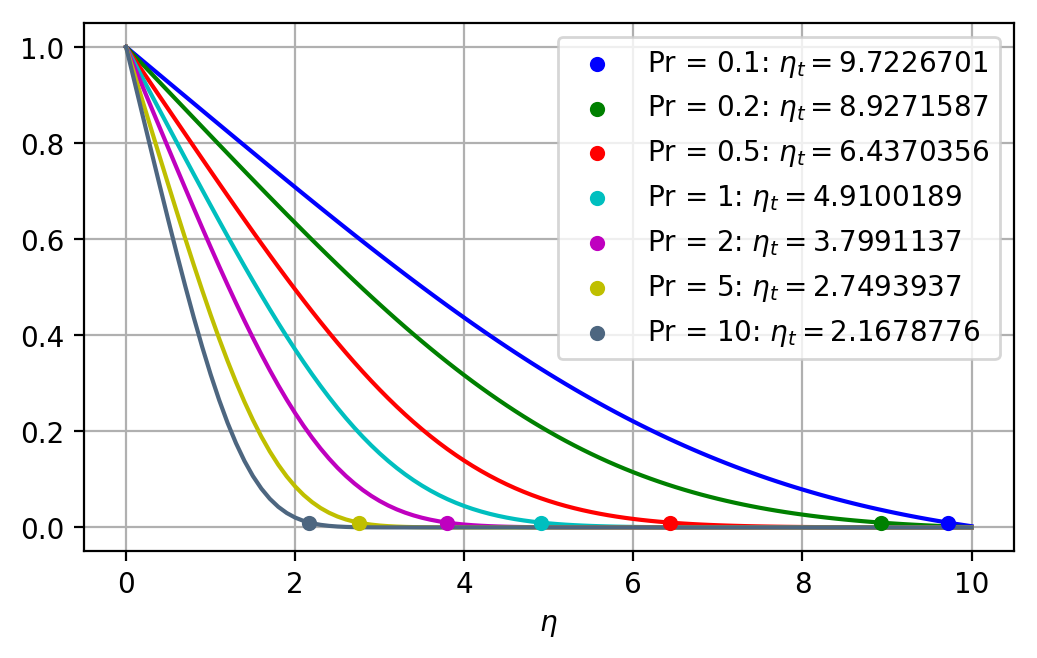

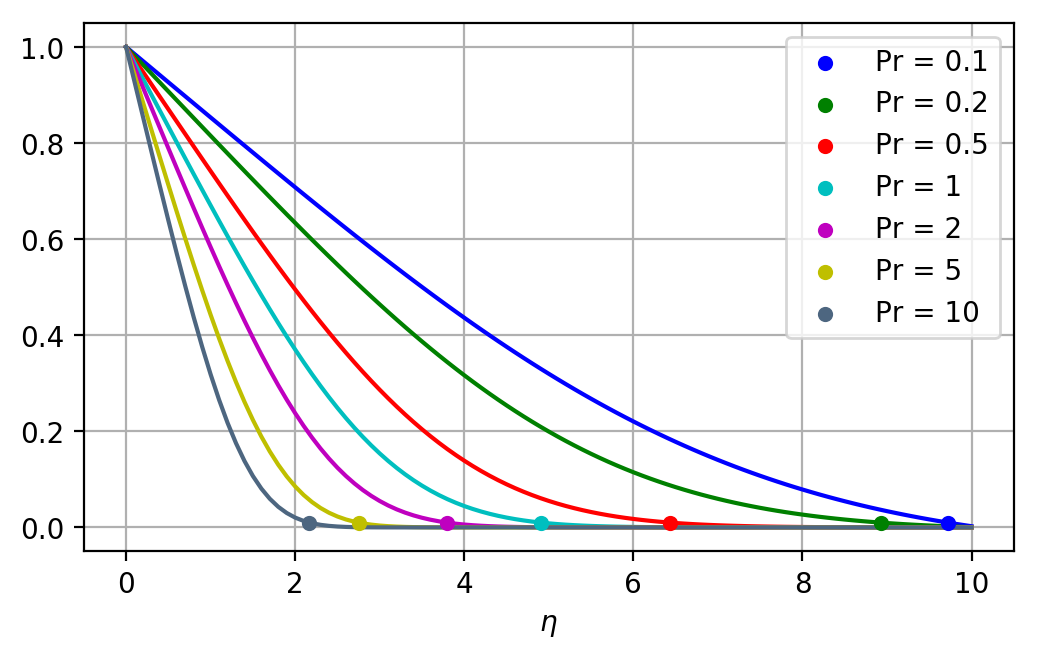

In [80]:
# plotting dimensionless velocity
fig = plt.figure(figsize = (6, 3.5), dpi = 200)
ax = fig.add_subplot(1, 1, 1)
ax.plot(eta, u_, label=r'$F^{\prime}(\eta)$')
ax.plot(eta, v_, label=r'$\frac{1}{2}[\eta F^{\prime}(\eta) - F(\eta)]$')
ax.scatter(eta_m, 0.99, s=20, color='m', zorder=10, label=r'$\eta_m = 4.9100188$')
ax.plot(eta_m * np.ones(100), arange(0,1,0.01), color='m', linestyle='dashed', lw=1)
ax.set_xlabel(r'$\eta$')
ax.grid()
ax.legend()
plt.savefig('Fig2.png')
plt.show()

# plotting dimensionless temperature
fig = plt.figure(figsize = (6, 3.5), dpi = 200)
ax = fig.add_subplot(1, 1, 1)

j = 0
c = ['b', 'g', 'r', 'c', 'm', 'y', [0.3,0.4,0.5]]
for Pr in [0.1, 0.2, 0.5, 1, 2, 5, 10]:
    h = 0.1
    eta = arange(0, 10 + h, h)
    y1 = zeros(len(eta) + 1)
    y2 = zeros(len(eta) + 1)
    y3 = zeros(len(eta) + 1)
    y4 = zeros(len(eta) + 1)
    y5 = zeros(len(eta) + 1)
    y1[0] = 0
    y2[0] = 0
    y3[0] = y3_0
    y4[0] = 1
    y5[0] = y5_0[j]
    y1, y2, y3, y4, y5 = RK4(eta, y1, y2, y3, y4, y5, h, Pr)
    ax.plot(eta, y4[:-1], color=c[j])
    ax.scatter(eta_t[j], 0.01, s=20, color=c[j], zorder=10, label=('Pr = '+repr(Pr) +r': $\eta_t = $'+str(np.round(eta_t[j], 7))))

    j += 1
    
#ax.set_title(r'Dimensionless Temperature $G(\eta)$')
ax.set_xlabel(r'$\eta$')
ax.grid()
ax.legend()
plt.savefig('Fig3.png')
plt.show()

# plotting dimensionless temperature
fig = plt.figure(figsize = (6, 3.5), dpi = 200)
ax = fig.add_subplot(1, 1, 1)
j = 0
c = ['b', 'g', 'r', 'c', 'm', 'y', [0.3,0.4,0.5]]
for Pr in [0.1, 0.2, 0.5, 1, 2, 5, 10]:
    h = 0.1
    eta = arange(0, 10 + h, h)
    y1 = zeros(len(eta) + 1)
    y2 = zeros(len(eta) + 1)
    y3 = zeros(len(eta) + 1)
    y4 = zeros(len(eta) + 1)
    y5 = zeros(len(eta) + 1)
    y1[0] = 0
    y2[0] = 0
    y3[0] = y3_0
    y4[0] = 1
    y5[0] = y5_0[j]
    y1, y2, y3, y4, y5 = RK4(eta, y1, y2, y3, y4, y5, h, Pr)
    ax.plot(eta, y4[:-1], color=c[j])
    ax.scatter(eta_t[j], 0.01, s=20, color=c[j], zorder=10, label=('Pr = '+repr(Pr)))

    j += 1
    
#ax.set_title(r'Dimensionless Temperature $G(\eta)$')
ax.set_xlabel(r'$\eta$')
ax.grid()
ax.legend()
plt.savefig('Fig3_bis.png')
plt.show()

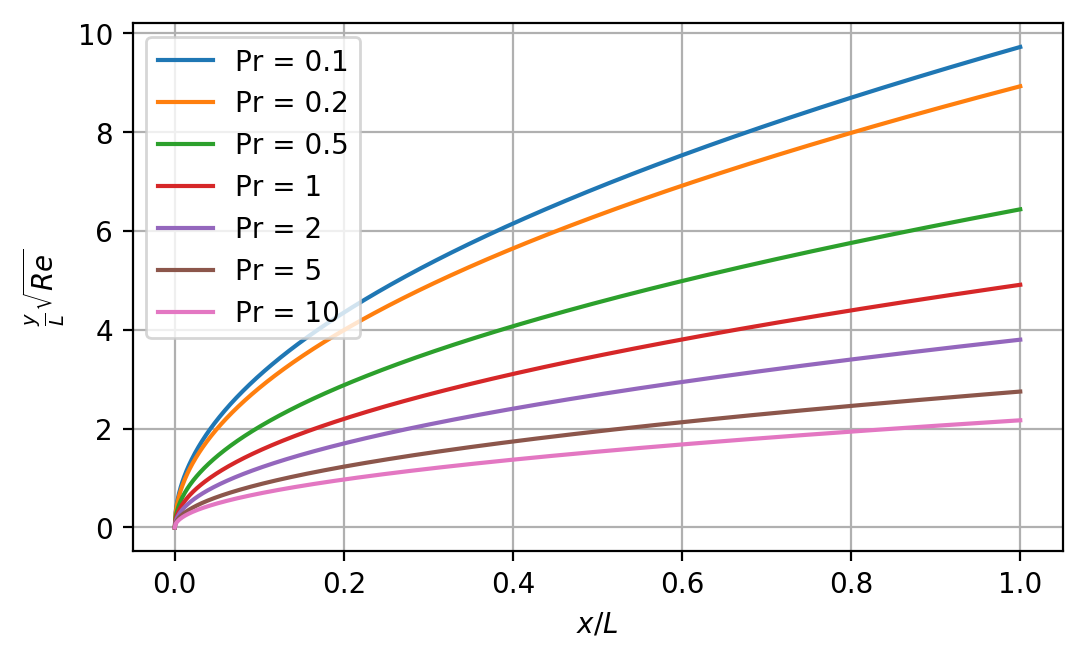

In [68]:
n = 0.001
x_L = arange(0,1+n,n)

fig = plt.figure(figsize = (6, 3.5), dpi = 200)
ax = fig.add_subplot(1, 1, 1)
j = 0
for Pr in [0.1, 0.2, 0.5, 1, 2, 5, 10]:
    # dimensionless groupings
    dim_grp_t = eta_t[j] * np.sqrt(x_L)
    ax.plot(x_L, dim_grp_t, label='Pr = '+repr(Pr))
    j += 1
    
ax.set_xlabel(r'$x/L$')
ax.set_ylabel(r'$\frac{y}{L}\sqrt{Re}$')
ax.set_title('Thermal Boundary Layer Thickness at Different Pr Numbers')
ax.legend()
ax.grid()
plt.show()